In [60]:
import xarray as xr
import numpy as np
import tools
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from datetime import datetime 
from datetime import timedelta

# Validate OSSE observation files

Observations files have been created for the OSSE using the WMOP forecast as Nature Run (NR). 

HFR observations have been created considering the actual coverage area where both antennas have coverage and total currents are provided and distributed. For the future HF radar site, the coverage area has been considered according to expert criteria about localization and range (Emma Reyes). Once considered the area of the actual or future HFR system, the NR model U and V velocity fields within the area have been considered. Model resolution (2km) is slightly higher to real observations (3km). In future releases this might be considered and virtual observations might be interpolated to a 3km resolution grid.
A 15% of the observation among the total of the area have been randomly extracted to simulate possible gaps in the data and have been storaged for validation purposes.  

SLA observations have been extracted from the NR and interpolated in time and space to make them coincident with real observations

SST observations have been extracted from the NR, interpolated in space and in time to get the model sea surface temperature at 8am. This way we supposedly gathering the temperature without the diurnal cycle as the SST foundation product does.

#### Path to virtual and real observations

In [48]:
obs_path = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_OSSE/'
obs_path2 = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_all_nudging_Oct2014/'

obsfile = glob(obs_path + '*ARGO_HFR_*future*')   # virtual Obs
obsfile2 = glob(obs_path2 + '*Argo_HFR_*obs')     # Real Obs
obsfile_val = glob(obs_path + '/hfr_validation/*HFR_future_val*')  # Virtual HFR obs for validation
obsfile.sort()
obsfile_val.sort()
obsfile2.sort()

In [56]:
%matplotlib inline

## Plot HFR Observations

Plot virtual observations created for U and V velocities, as well as the subset observations for validation

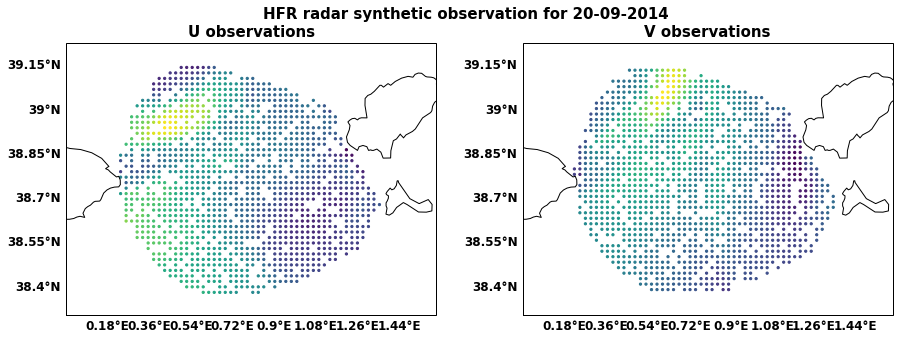

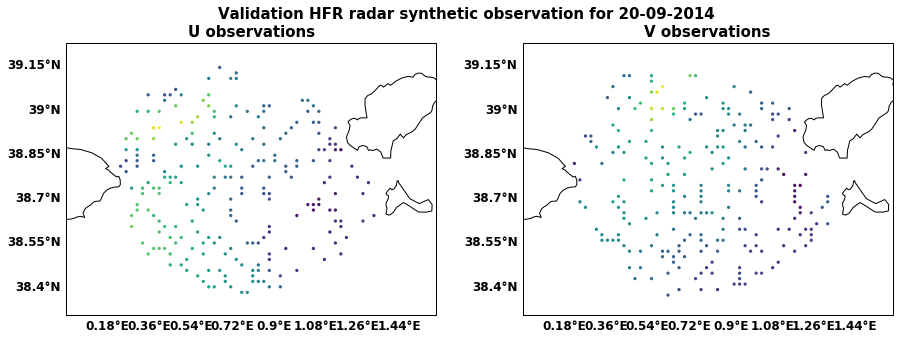

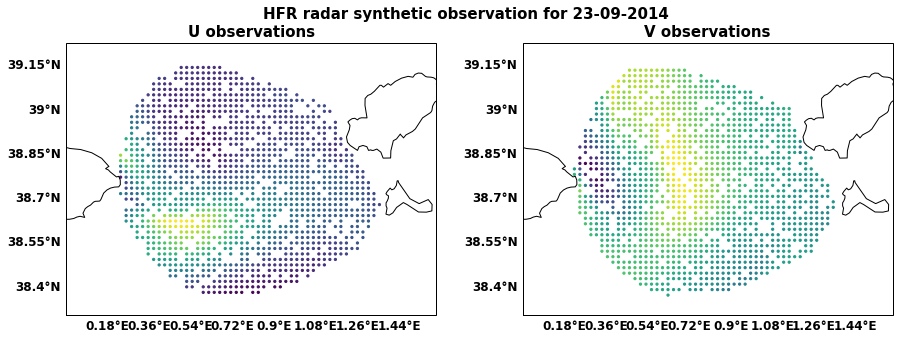

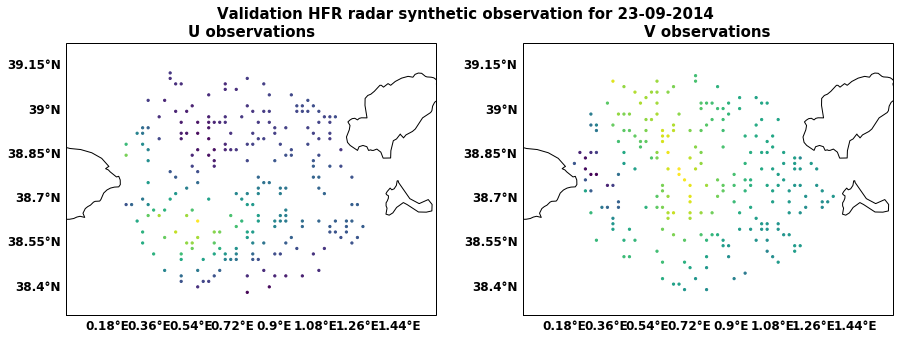

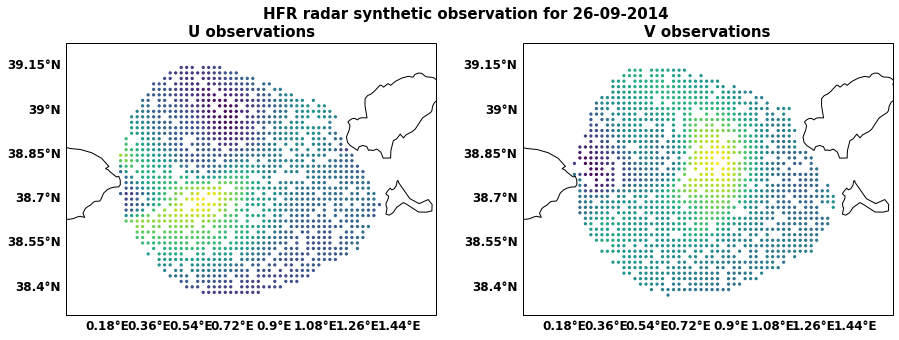

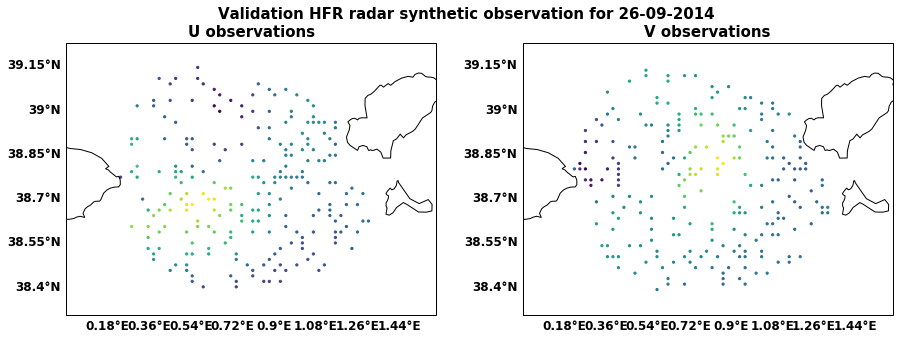

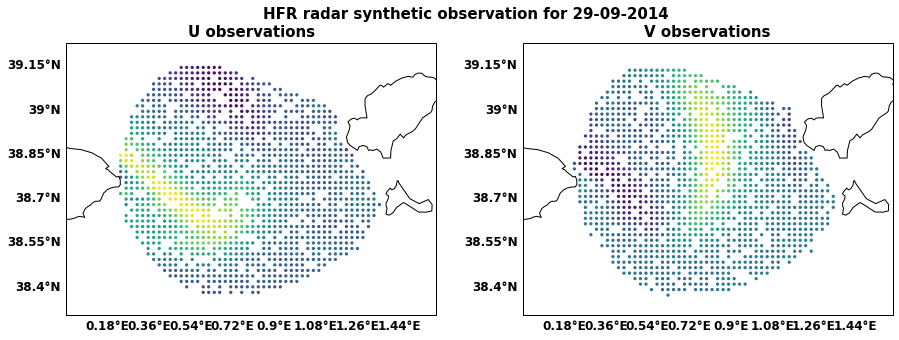

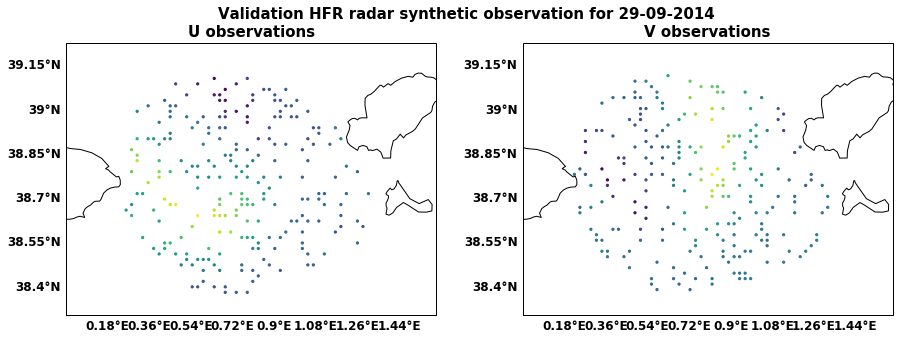

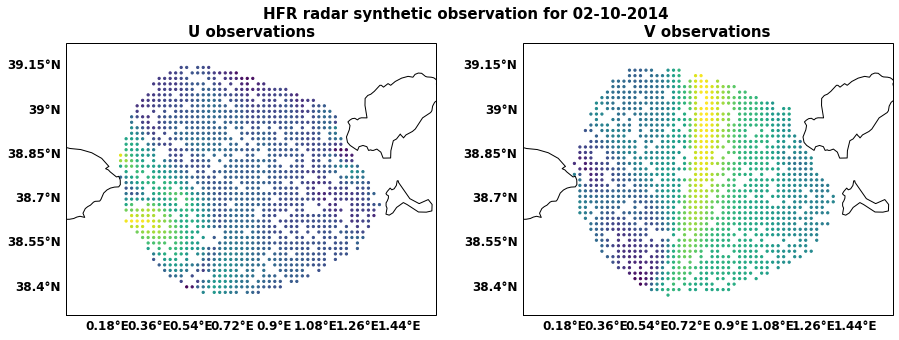

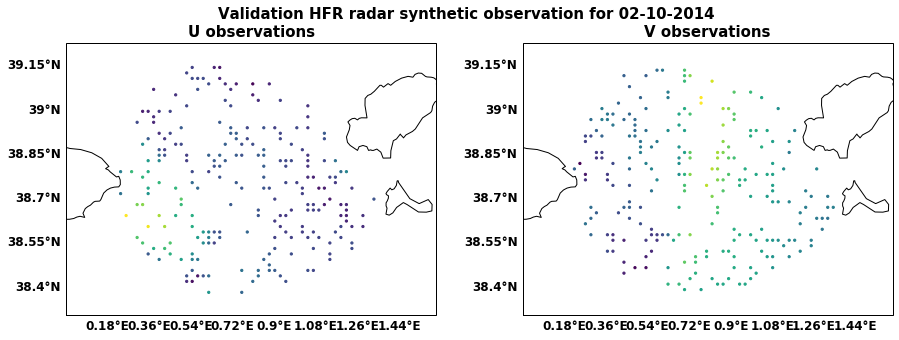

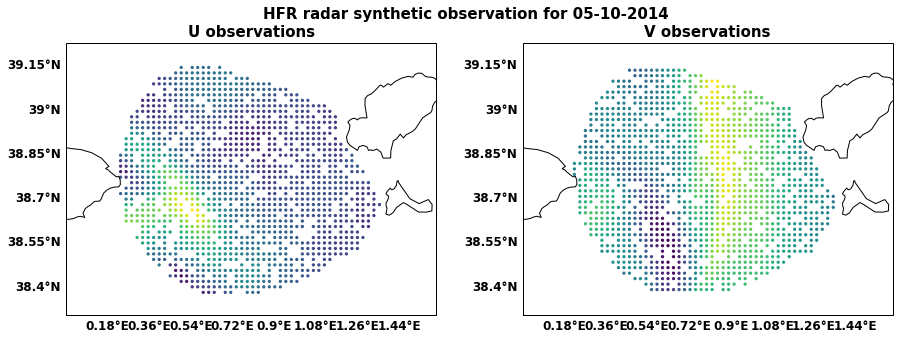

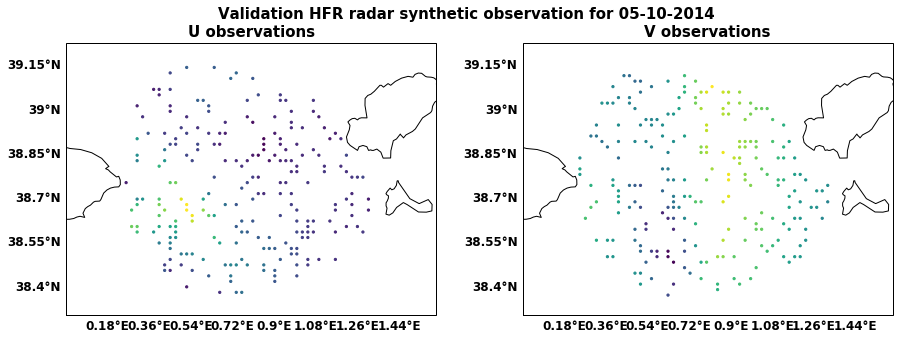

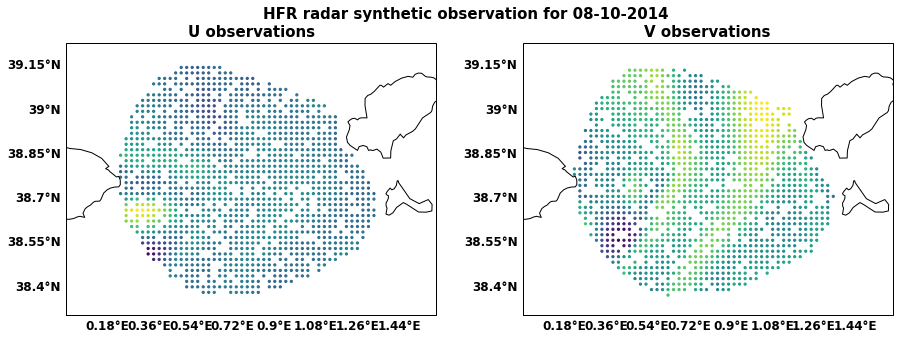

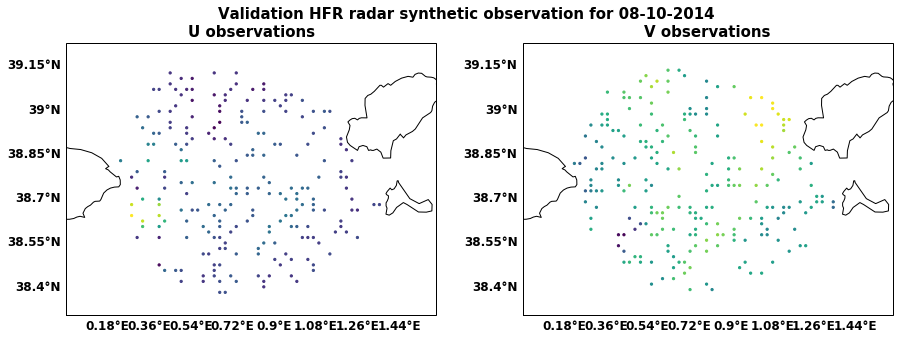

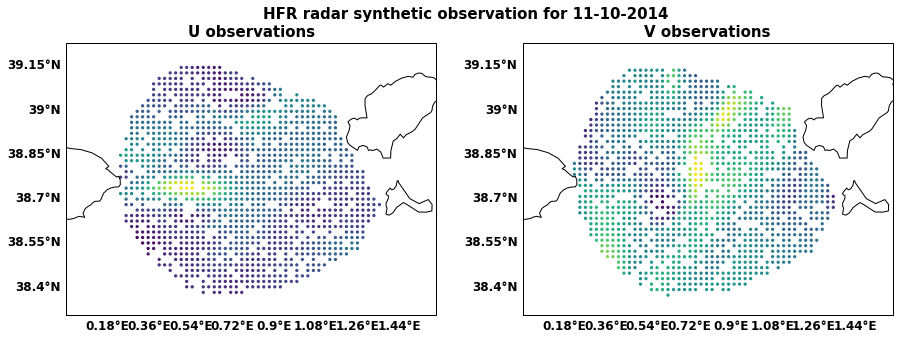

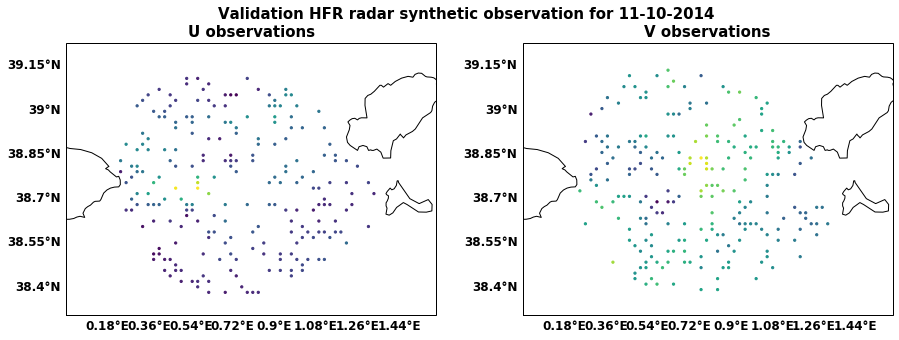

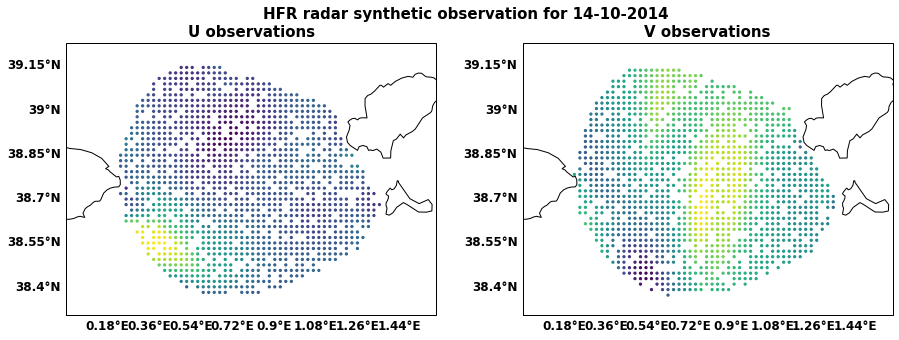

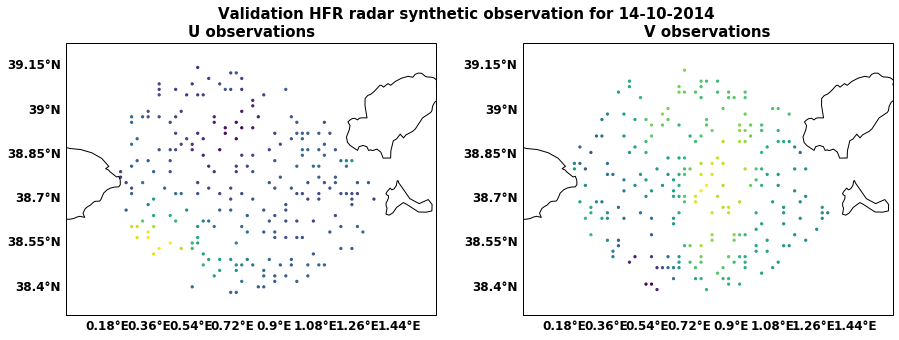

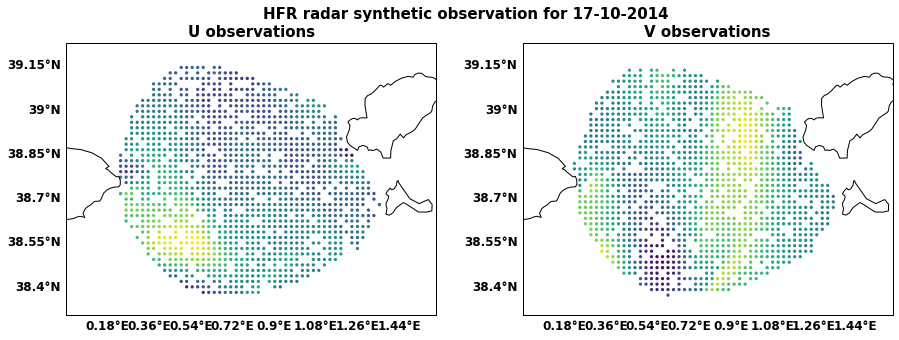

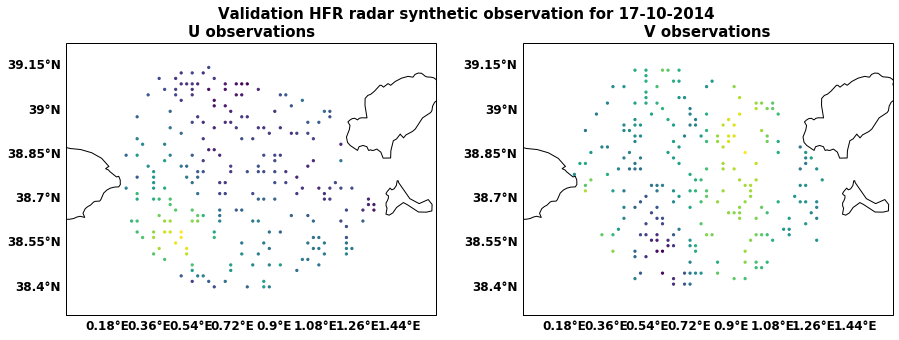

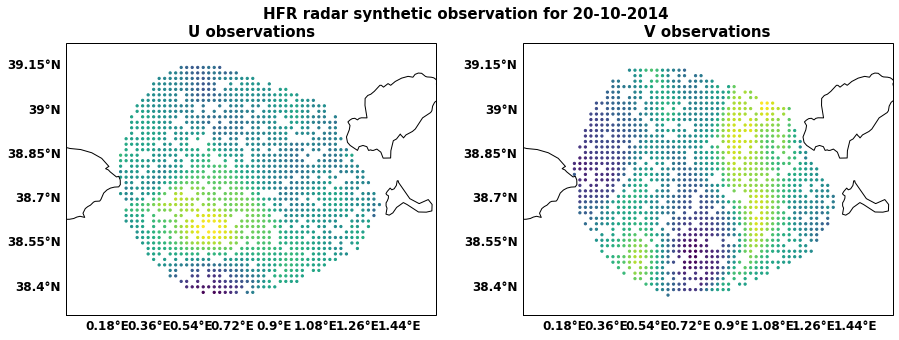

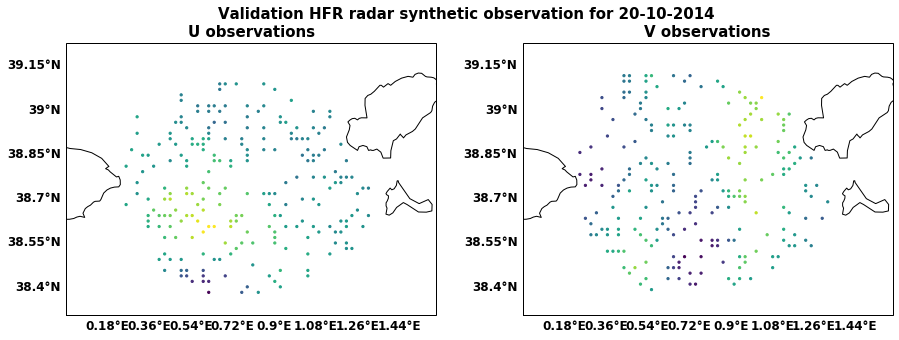

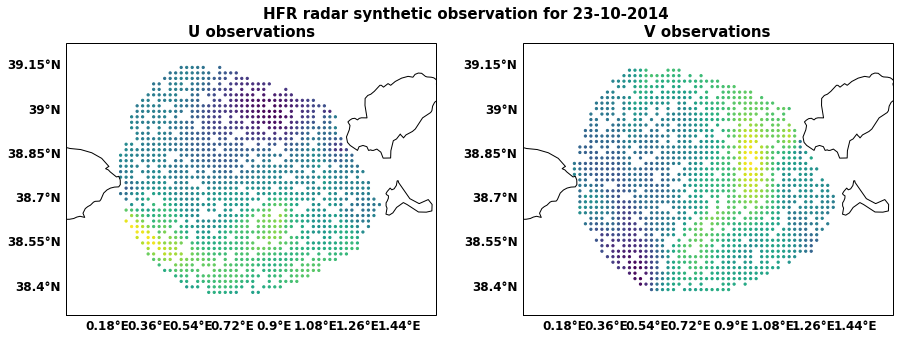

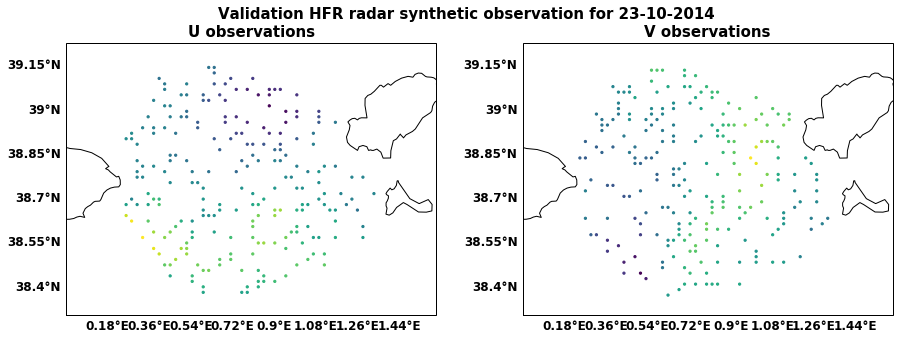

In [145]:
for f1, f2 in zip(obsfile, obsfile_val):
       
    df = tools.read_obsfile(f1)
    df_val = tools.read_obsfile(f2)
    
    date_obs = datetime(int(df.iloc[-1]['year']), int(df.iloc[-1]['month']), int(df.iloc[-1]['day']))
    strdate_obs = date_obs.strftime('%Y%m%d')
    
    
    # Scatter plot U and V
    plt.figure(figsize=(15,5))

    ax, gl = tools.make_map(continents=False, limits=[0, 1.6, 38.3, 39.22], subplot_dim=121)
    plt.scatter(df.lon[df['var']=='u'], df.lat[df['var']=='u'], 5, df.val[df['var']=='u'], transform=gl.crs)
    plt.title('U observations', fontsize=15, fontweight='bold')
    ax, gl = tools.make_map(continents=False, limits=[0, 1.6, 38.3, 39.22], subplot_dim=122)
    plt.scatter(df.lon[df['var']=='v'], df.lat[df['var']=='v'], 5, df.val[df['var']=='v'], transform=gl.crs)
    plt.title('V observations', fontsize=15, fontweight='bold')
    plt.suptitle('HFR radar synthetic observation for {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    plt.show()
    
    
    # Scatter plot U and V taken out for validation
    plt.figure(figsize=(15,5))

    ax, gl = tools.make_map(continents=False, limits=[0, 1.6, 38.3, 39.22], subplot_dim=121)
    plt.scatter(df_val.lon[df_val['var']=='u'], df_val.lat[df_val['var']=='u'], 5, df_val.val[df_val['var']=='u'], transform=gl.crs)
    plt.title('U observations', fontsize=15, fontweight='bold')
    ax, gl = tools.make_map(continents=False, limits=[0, 1.6, 38.3, 39.22], subplot_dim=122)
    plt.scatter(df_val.lon[df_val['var']=='v'], df_val.lat[df_val['var']=='v'], 5, df_val.val[df_val['var']=='v'], transform=gl.crs)
    plt.title('V observations', fontsize=15, fontweight='bold')
    plt.suptitle('Validation HFR radar synthetic observation for {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    
    plt.show()

## Plot SLA observations

#### Comparison of real and virtual observations for all the different observation datasets used for DA

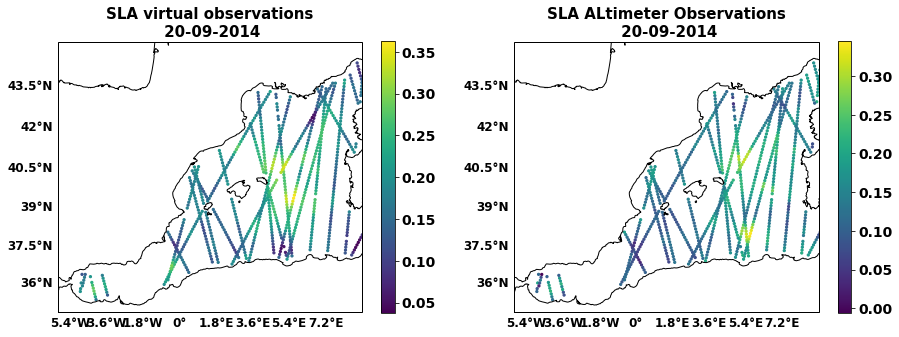

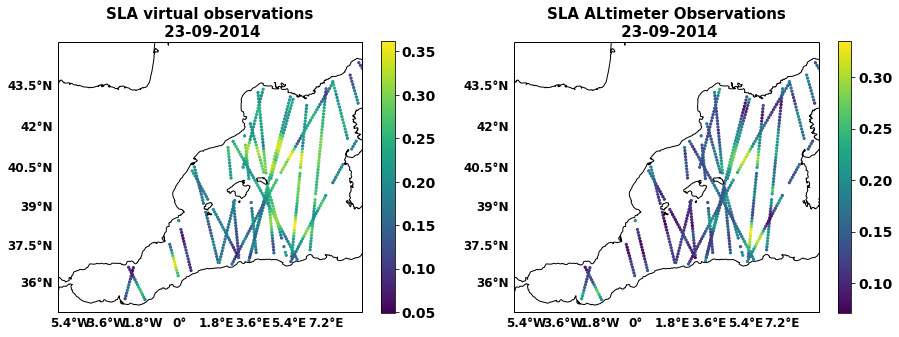

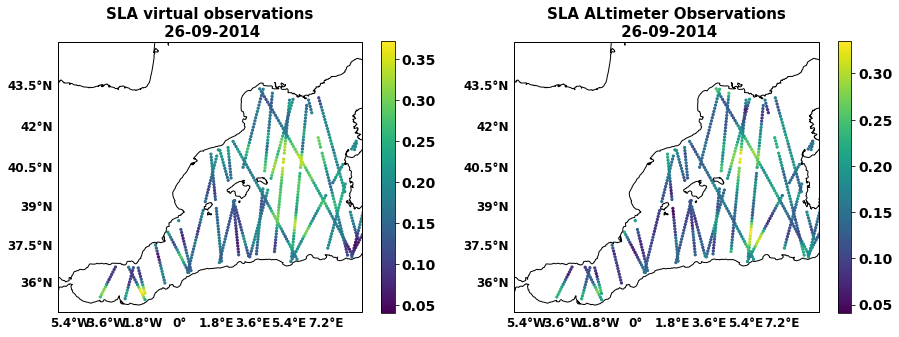

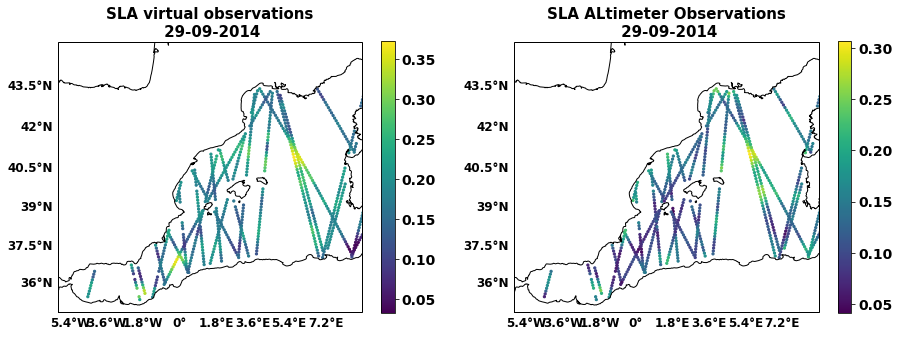

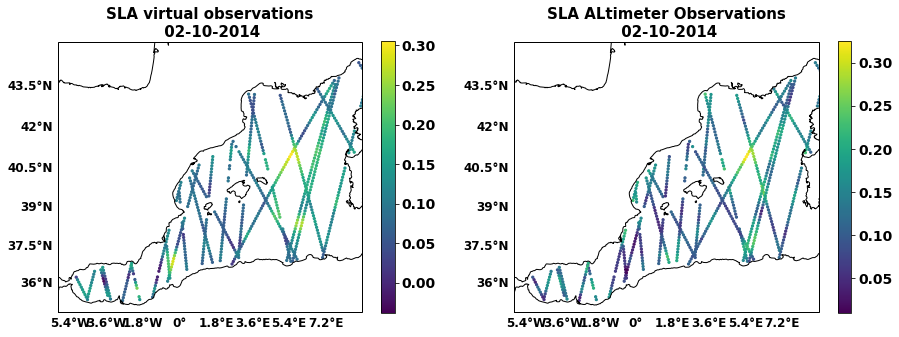

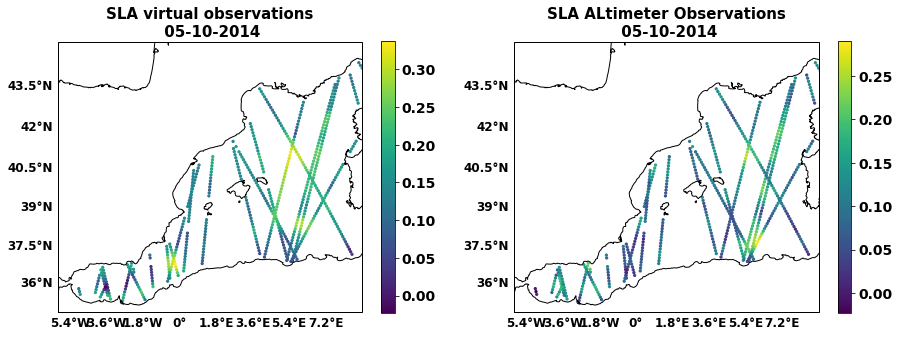

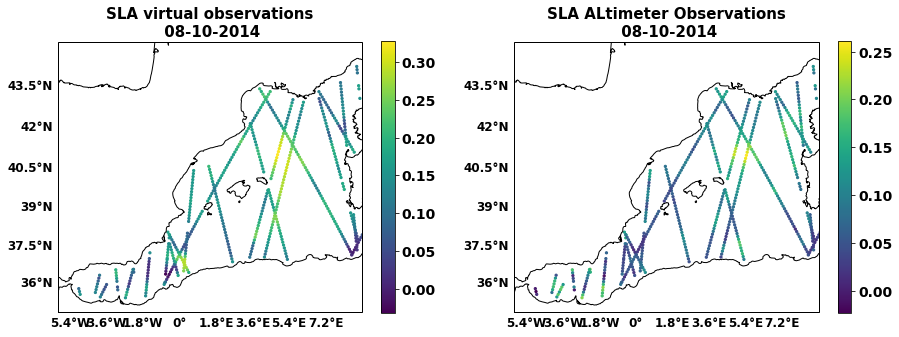

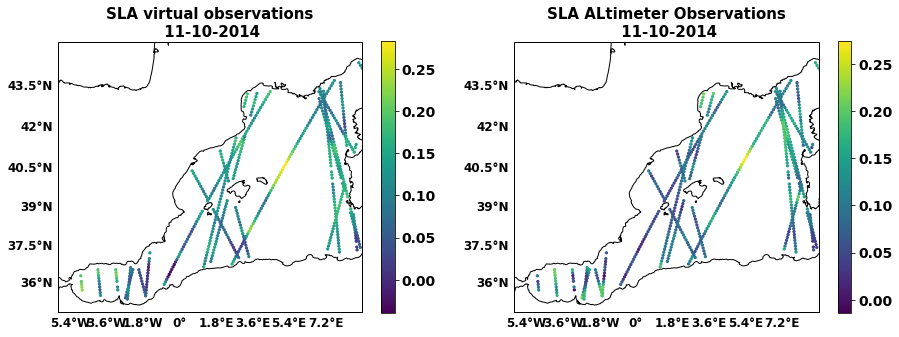

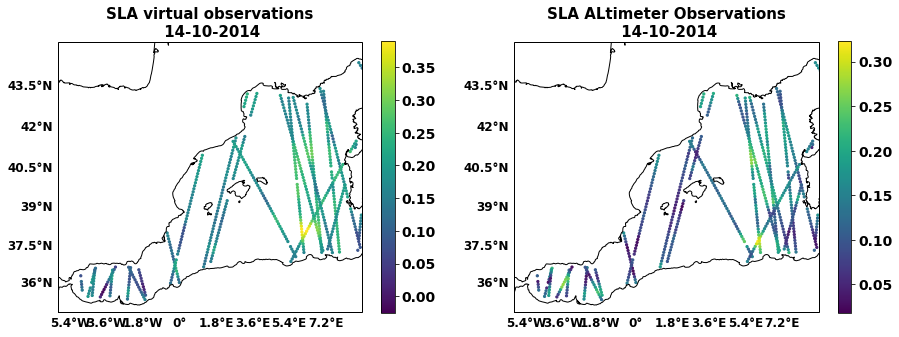

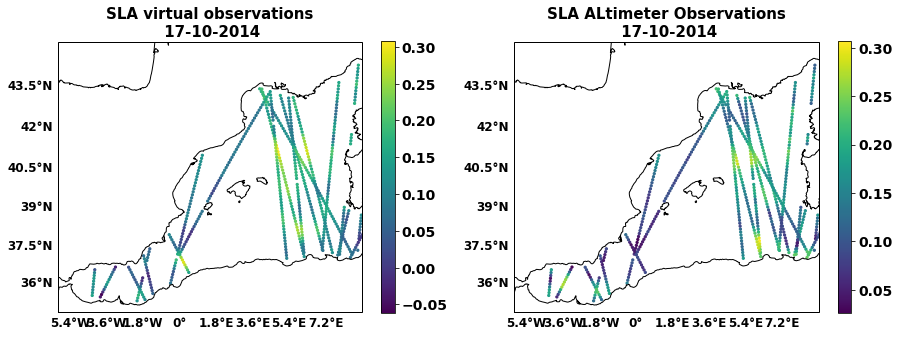

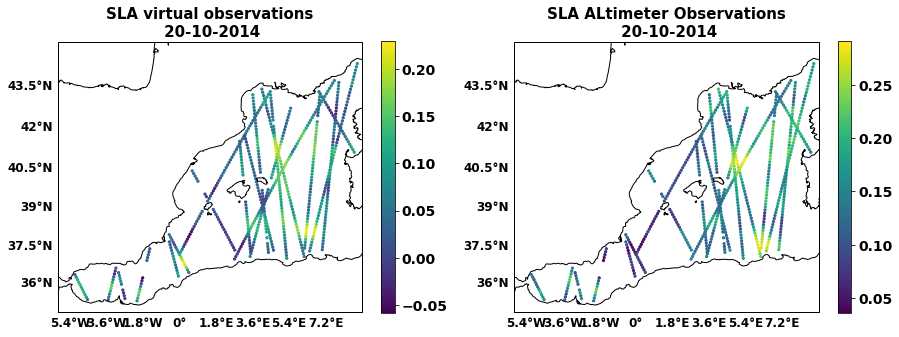

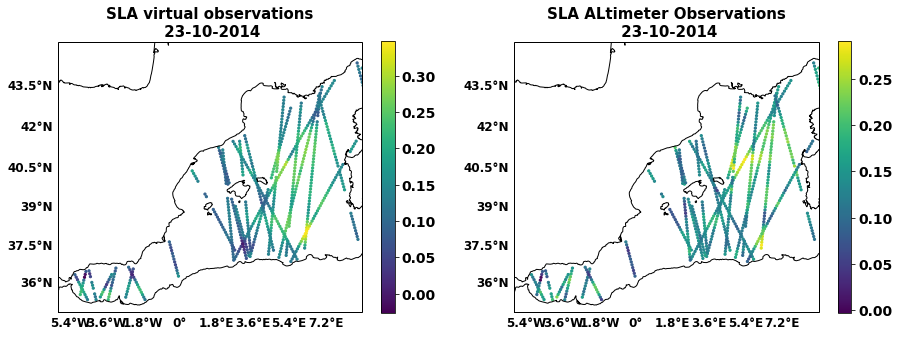

In [141]:
for f1, f2 in zip(obsfile, obsfile2):
    
    df = tools.read_obsfile(f1)
    df2 = tools.read_obsfile(f2)
    
    date_obs = datetime(int(df.iloc[-1]['year']), int(df.iloc[-1]['month']), int(df.iloc[-1]['day']))
    strdate_obs = date_obs.strftime('%Y%m%d')
    
    plt.figure(figsize=(15,5))

    ax, gl = tools.make_map(continents=False, subplot_dim=121)
    plt.scatter(df.lon[df['var']=='h'], df.lat[df['var']=='h'], 5, df.val[df['var']=='h'], transform=gl.crs)
    plt.colorbar()
    plt.title('SLA virtual observations\n {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')

    ax, gl = tools.make_map(continents=False, subplot_dim=122)
    plt.scatter(df2.lon[df2['var']=='h'], df2.lat[df2['var']=='h'], 5, df2.val[df2['var']=='h'], transform=gl.crs)
    plt.colorbar()
    plt.title('SLA ALtimeter Observations\n {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    

    plt.show()

### Histogram of SLA observations

In [75]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

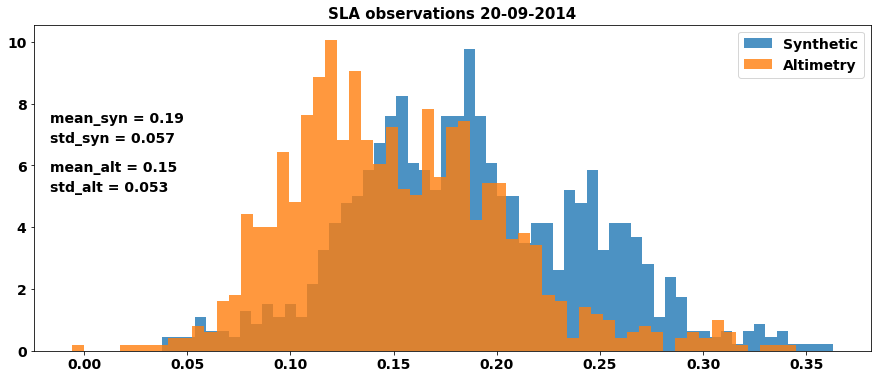

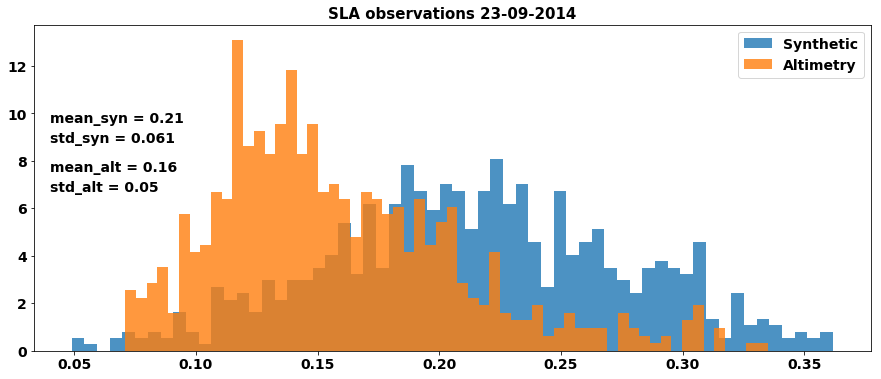

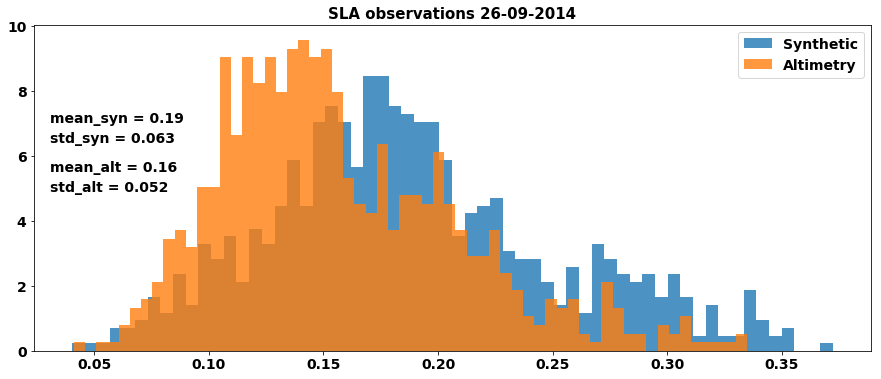

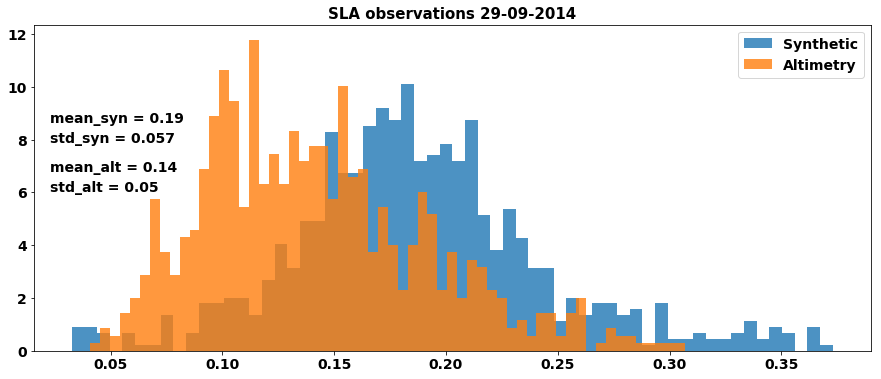

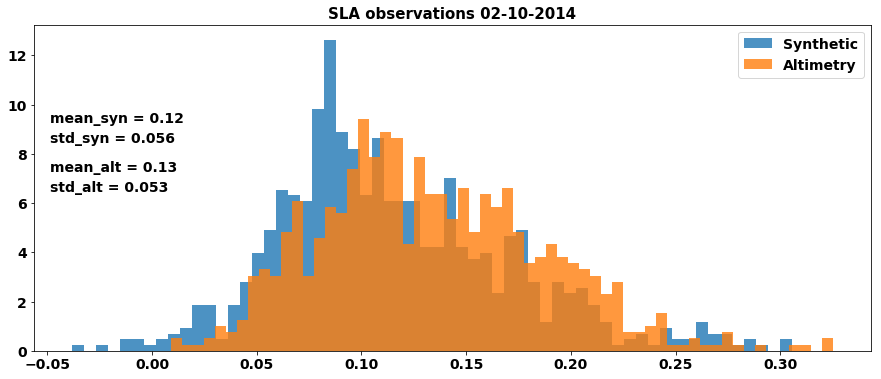

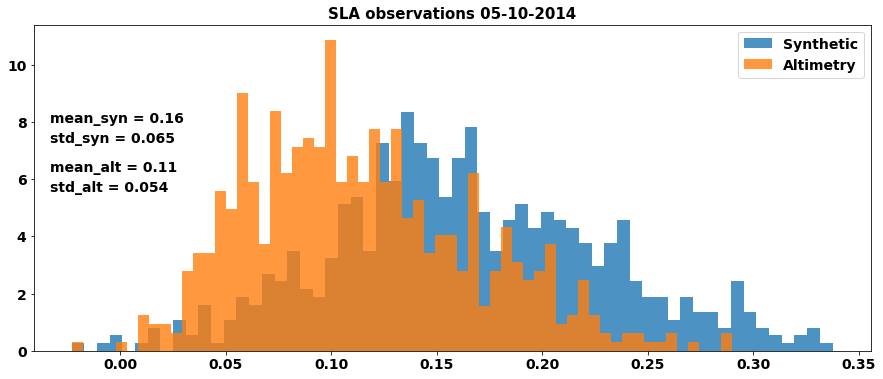

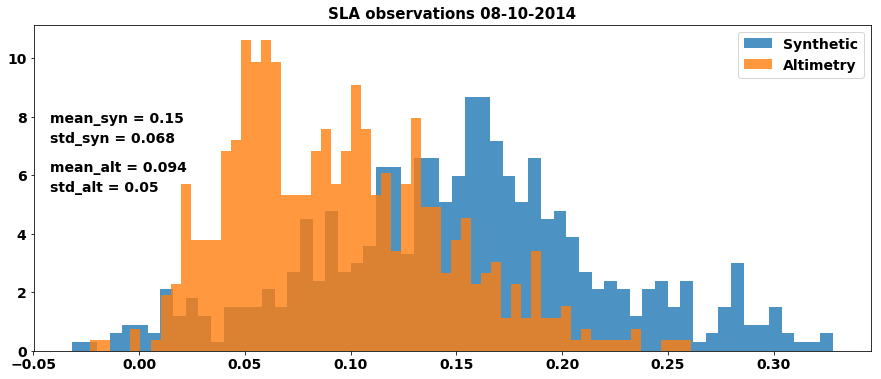

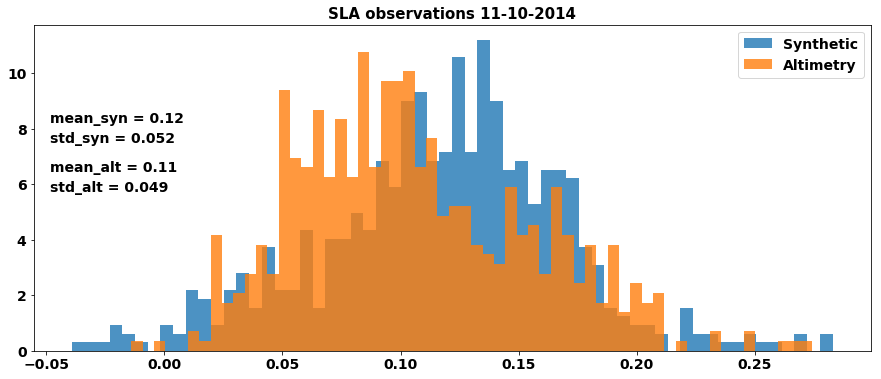

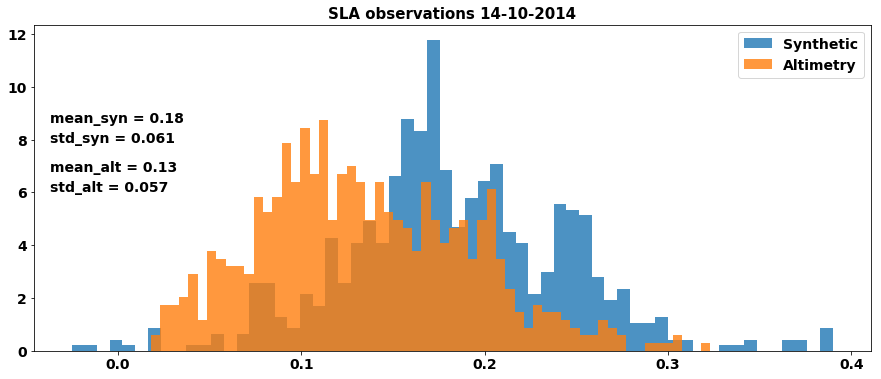

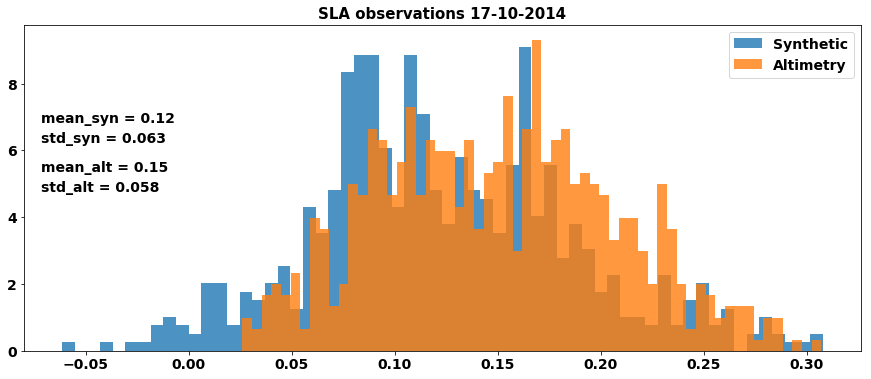

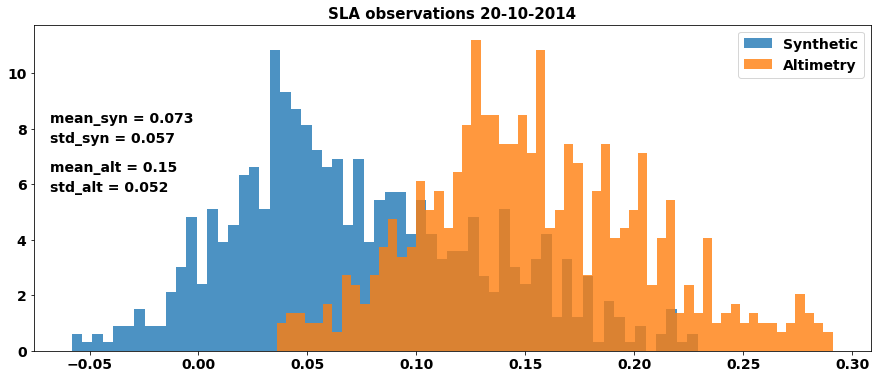

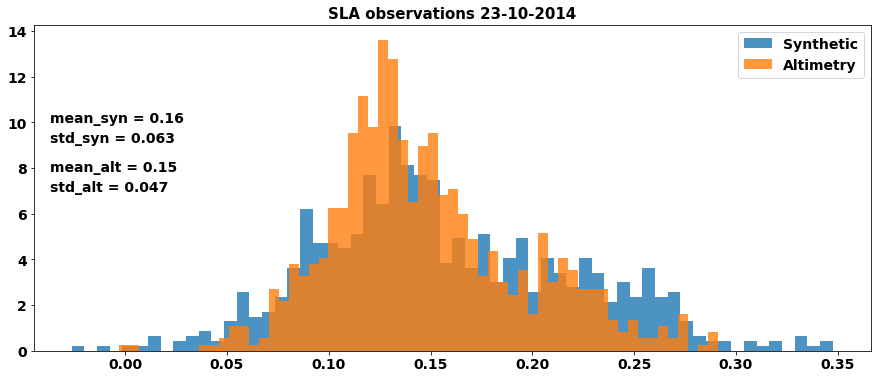

In [116]:
for f1, f2 in zip(obsfile, obsfile2):
    
    df = tools.read_obsfile(f1)
    df2 = tools.read_obsfile(f2)
    
    date_obs = datetime(int(df.iloc[-1]['year']), int(df.iloc[-1]['month']), int(df.iloc[-1]['day']))
    strdate_obs = date_obs.strftime('%Y%m%d')
    
    plt.figure(figsize=(15,6))
    ax = plt.subplot(111)

    plt.hist(df.val[df['var']=='h'], 60, density=True, alpha=0.8)
    plt.hist(df2.val[df2['var']=='h'], 60, density=True, alpha=0.8)
    
    plt.text(0.02, 0.7, 'mean_syn = {0:0.2}'.format(np.mean(df.val[df['var']=='h'])), transform=ax.transAxes)
    plt.text(0.02, 0.64, 'std_syn = {0:0.2}'.format(np.std(df.val[df['var']=='h'])), transform=ax.transAxes)
    
    plt.text(0.02, 0.55, 'mean_alt = {0:0.2}'.format(np.mean(df2.val[df2['var']=='h'])), transform=ax.transAxes)
    plt.text(0.02, 0.49, 'std_alt = {0:0.2}'.format(np.std(df2.val[df2['var']=='h'])), transform=ax.transAxes)
    
    plt.title('SLA observations {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    
    plt.legend(['Synthetic', 'Altimetry'])

## Plot SST Observations

#### Comparison of real and virtual observations for all the different observation datasets used for DA

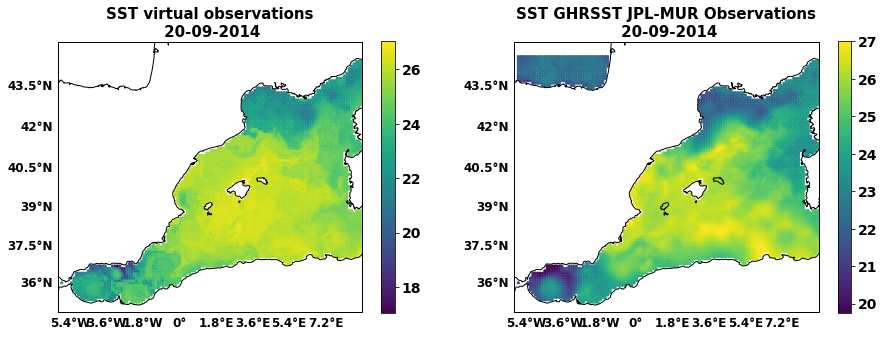

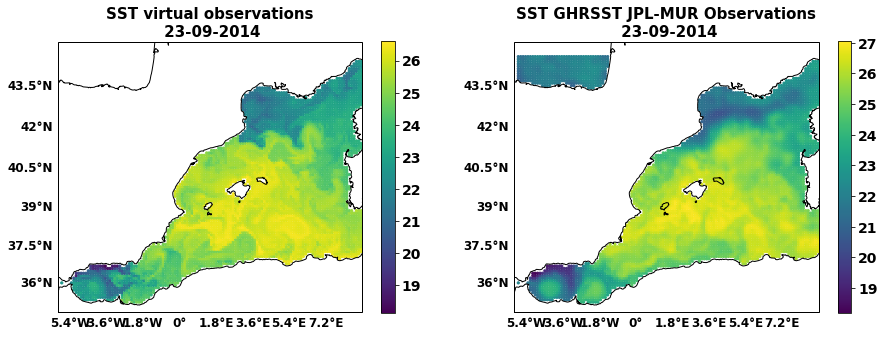

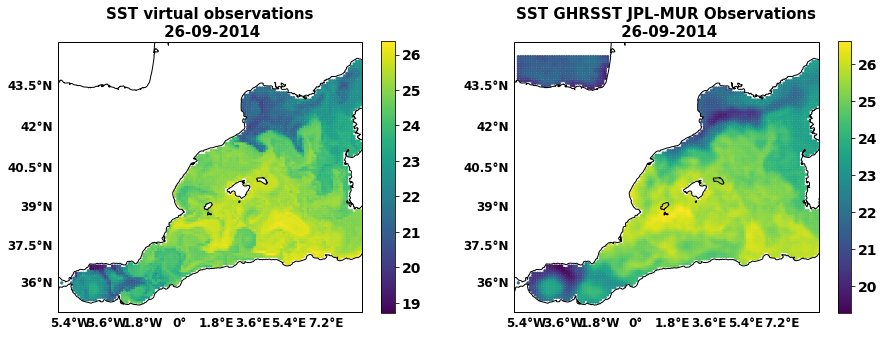

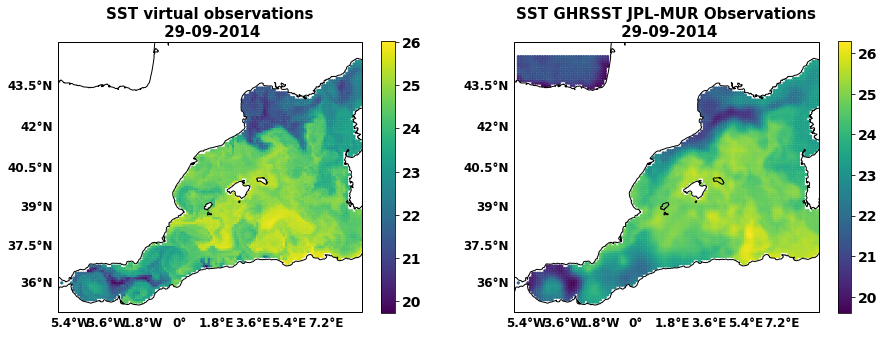

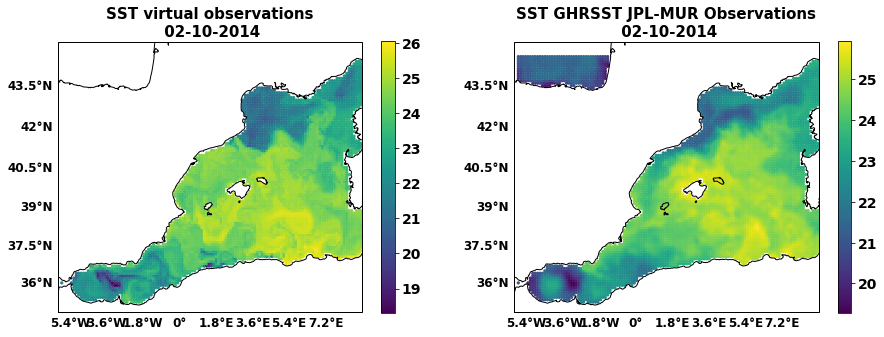

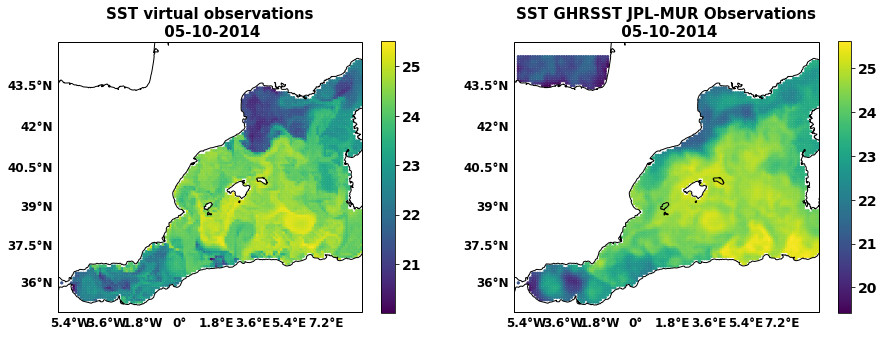

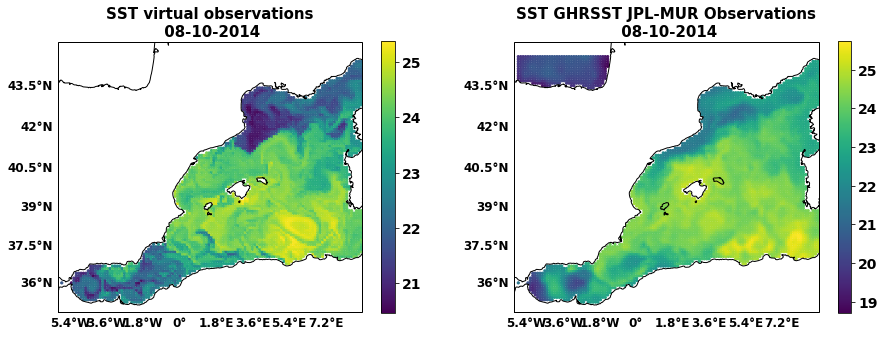

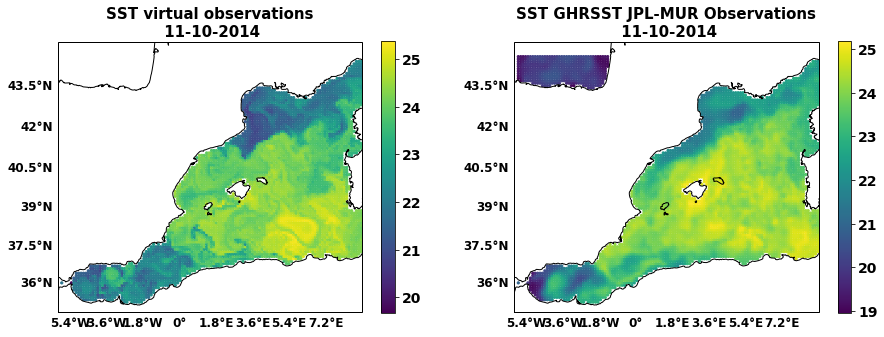

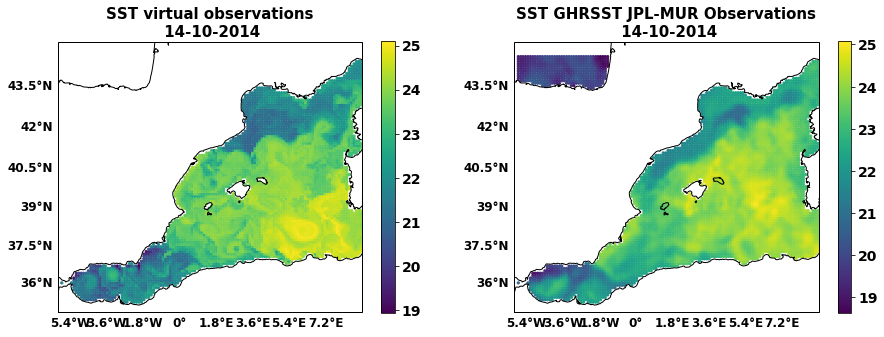

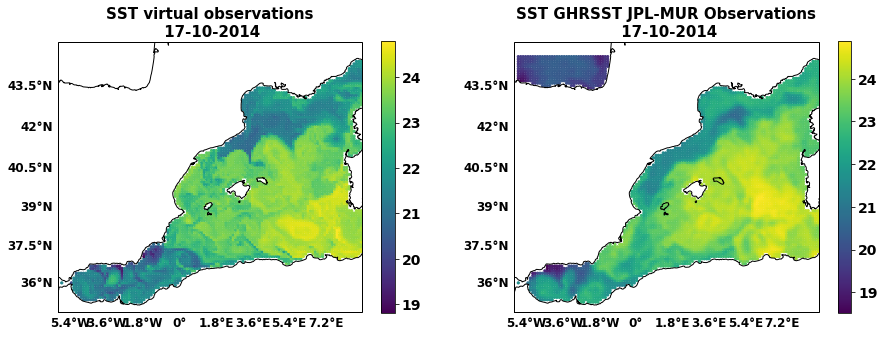

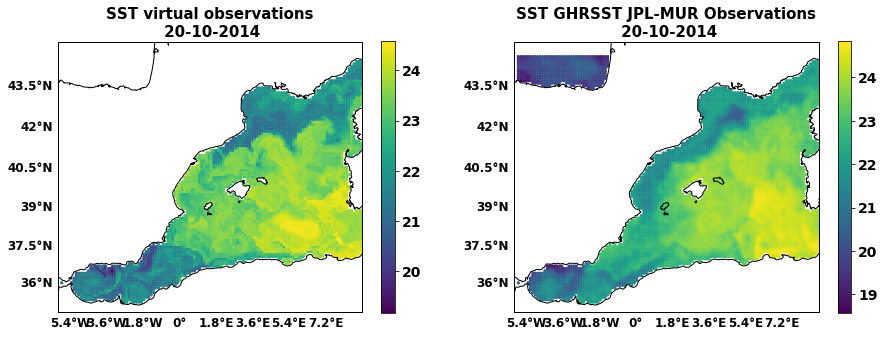

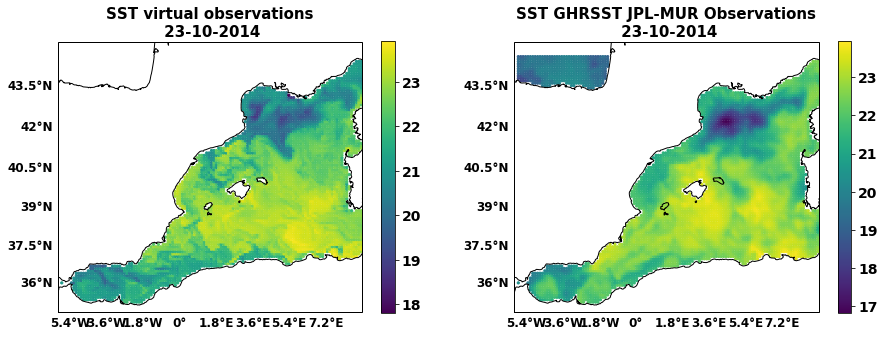

In [120]:
for f1, f2 in zip(obsfile, obsfile2):
    
    df = tools.read_obsfile(f1)
    df2 = tools.read_obsfile(f2)
    
    date_obs = datetime(int(df.iloc[-1]['year']), int(df.iloc[-1]['month']), int(df.iloc[-1]['day']))
    strdate_obs = date_obs.strftime('%Y%m%d')
    
    plt.figure(figsize=(15,5))

    ax, gl = tools.make_map(continents=False, subplot_dim=121)
    plt.scatter(df.lon[df['source']=='GHRSST_JPL'], df.lat[df['source']=='GHRSST_JPL'], 5, df.val[df['source']=='GHRSST_JPL'], transform=gl.crs)
    plt.colorbar()
    plt.title('SST virtual observations\n {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')

    ax, gl = tools.make_map(continents=False, subplot_dim=122)
    plt.scatter(df2.lon[df2['source']=='GHRSST_JPL'], df2.lat[df2['source']=='GHRSST_JPL'], 5, df2.val[df2['source']=='GHRSST_JPL'], transform=gl.crs)
    plt.colorbar()
    plt.title('SST GHRSST JPL-MUR Observations\n {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    


## Histogram of SST Observations

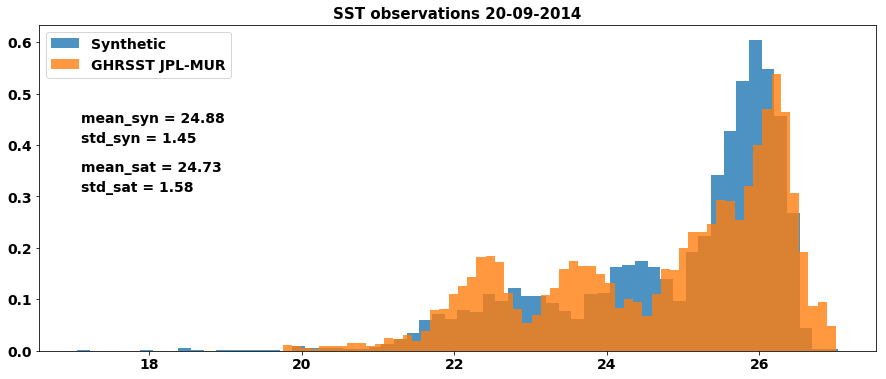

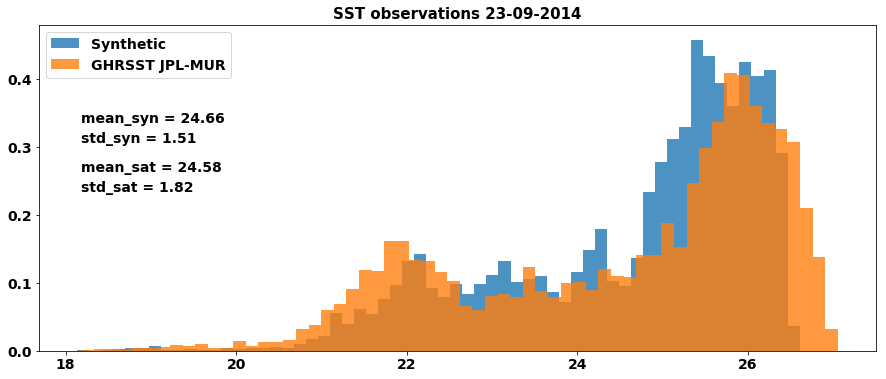

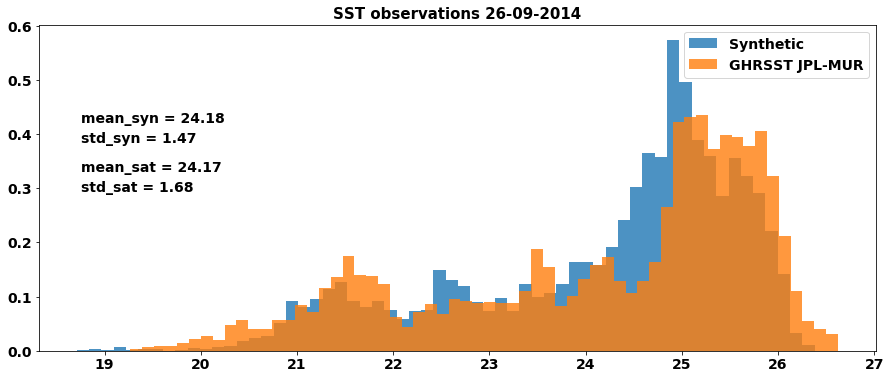

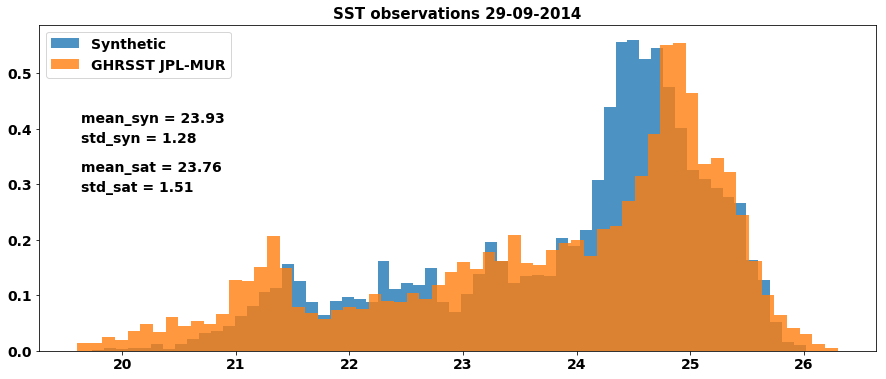

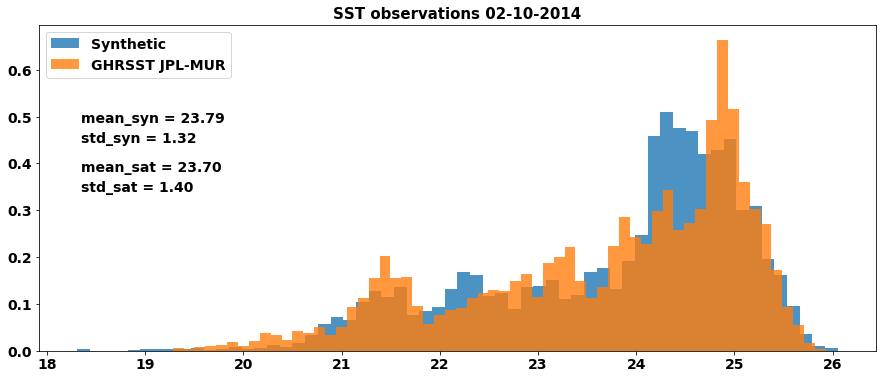

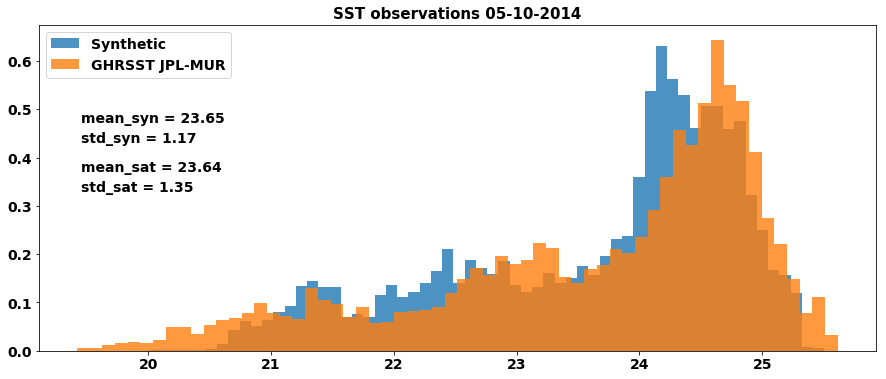

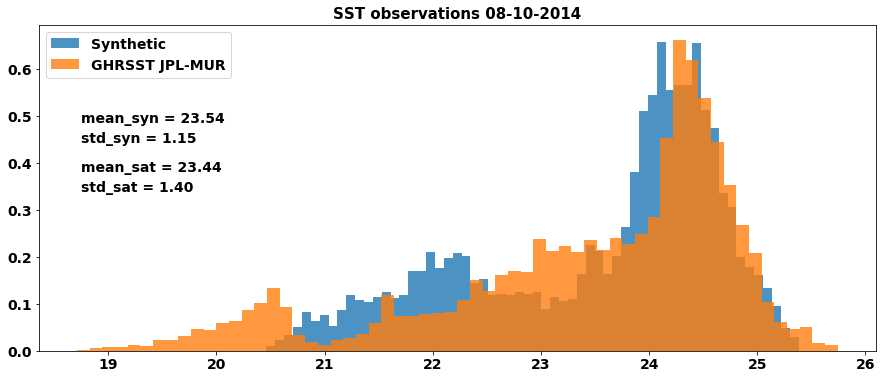

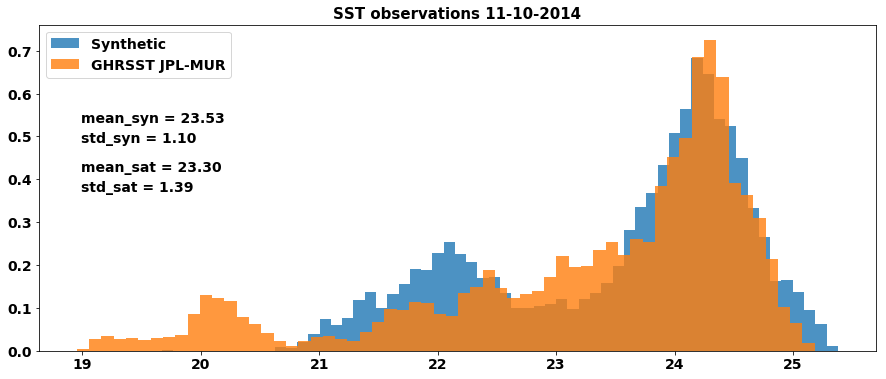

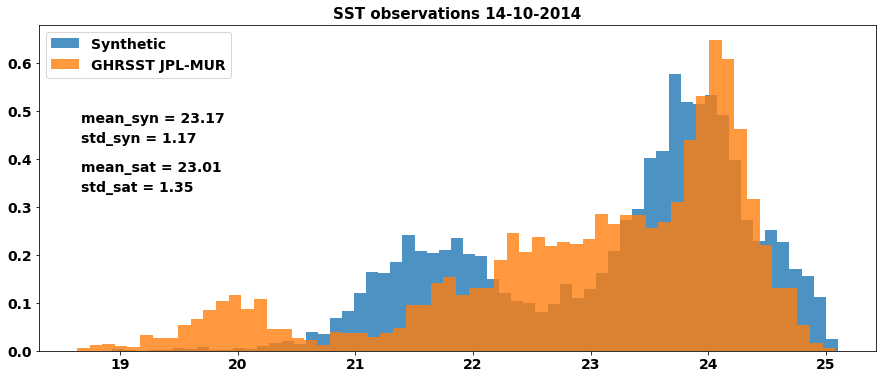

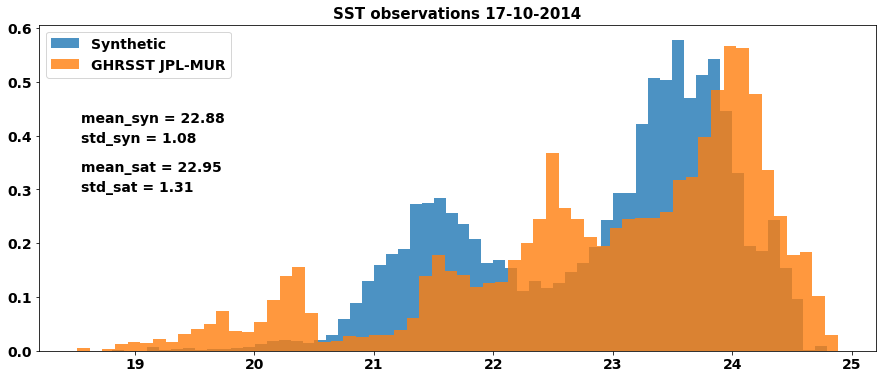

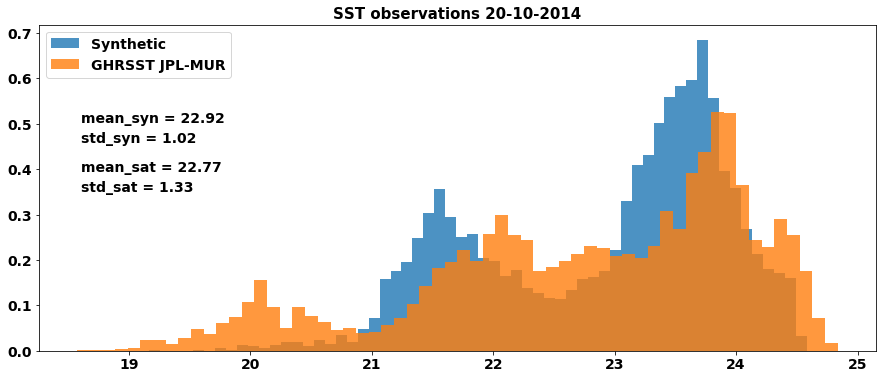

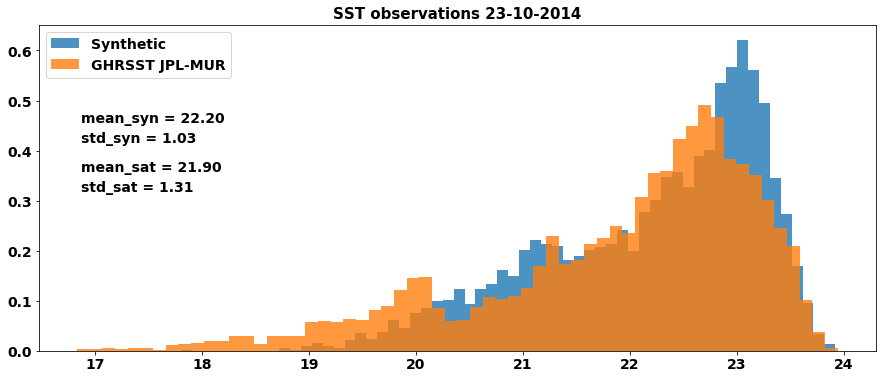

In [140]:
for f1, f2 in zip(obsfile, obsfile2):
    
    df = tools.read_obsfile(f1)
    df2 = tools.read_obsfile(f2)
    
    date_obs = datetime(int(df.iloc[-1]['year']), int(df.iloc[-1]['month']), int(df.iloc[-1]['day']))
    strdate_obs = date_obs.strftime('%Y%m%d')
    
    plt.figure(figsize=(15,6))
    ax = plt.subplot(111)

    plt.hist(df.val[df['source']=='GHRSST_JPL'], 60, density=True, alpha=0.8)
    plt.hist(df2.val[df2['source']=='GHRSST_JPL'], 60, density=True, alpha=0.8)
    
    plt.text(0.05, 0.7, 'mean_syn = {0:0.2f}'.format(np.mean(df.val[df['source']=='GHRSST_JPL'])), transform=ax.transAxes)
    plt.text(0.05, 0.64, 'std_syn = {0:0.2f}'.format(np.std(df.val[df['source']=='GHRSST_JPL'])), transform=ax.transAxes)
    
    plt.text(0.05, 0.55, 'mean_sat = {0:0.2f}'.format(np.mean(df2.val[df2['source']=='GHRSST_JPL'])), transform=ax.transAxes)
    plt.text(0.05, 0.49, 'std_sat = {0:0.2f}'.format(np.std(df2.val[df2['source']=='GHRSST_JPL'])), transform=ax.transAxes)
    
    plt.title('SST observations {0}'.format(date_obs.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    
    plt.legend(['Synthetic', 'GHRSST JPL-MUR'])